In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Вычислить число $
\pi$ с помощью метода Монте-Карло

$$
J = \iint\limits_{x^2+y^2<1}\,dx\,dy = \pi
$$
Сведем задачу к вычислению математического ожидания
$$
\iint\limits_{x^2+y^2<1}\,dx\,dy = 4\int I[x^2 + y^2<1] f(x,y) \,dx\,dy = 4\mathbf{M}I_{\xi_x^2 + \xi_y^2<1}(\xi) 
$$
где $f(x,y) = f_1(x)f_2(y)$ - равномерная плотность в квадрате для случайного вектора $\xi\in R^2$
$$
f(x,y) = \begin{cases}
\frac1S,& -1<x<1, 1<y<1  
\\
0,& \text{в противном случае},
\end{cases}
$$
где $S=4$ - площадь квадрата.
Тогда из ЗБЧ
$$
J \approx \frac4N \sum_{i=1}^N  I_{x^2 + y^2<1}(x_i,y_i)
$$
где
$$
I_{x^2 + y^2<1}(x_i,y_i) = 
\begin{cases}
1,& x^2 + y^2 <1
\\ 
0,&\text{в противном случае}
\end{cases}
$$


In [61]:
N = 3000
u = 1-2*np.random.rand(2, N)
in_c =  [[el[0],el[1]] for el in u.T if el[0]**2 + el[1]**2 <1]
v = map(lambda x : float(x[0]**2 + x[1]**2<1), u.T)
in_c = np.array(in_c)
I = 4*np.mean(list(v))
print('Результат для оценки интеграла:', I)

Результат для оценки интеграла: 3.1626666666666665


(0.0, 1.0)

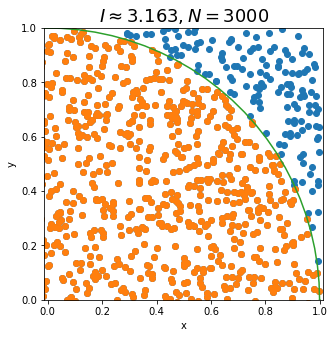

In [71]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(u[0,:],u[1,:],'o')
ax.plot(in_c.T[0,:],in_c.T[1,:],'o')
phi = np.linspace(0,2*np.pi,100)
ax.plot(np.cos(phi), np.sin(phi))
ax.axis('equal');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'$I\\approx {I:0.3f}, N={N}$', fontsize=18)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
#ax.set_ylim(0, 0.75**0.5)
#ax.axis('off')

In [72]:
fig.savefig('calc_pi.png')